In [1]:
import sys
sys.path.append('..')
from osp import *

In [2]:
df_pmla = get_pmla_df().set_index('id')

100%|██████████| 71902/71902 [00:03<00:00, 22326.65it/s]


In [3]:
df_jstor = get_jstor_data().set_index('id')

In [4]:
def collect_tree_stats(stash):
    all_tree_stats = []
    for id,docstr in tqdm(stash.items(),total=len(stash)):
        doc = stanza.Document.from_serialized(docstr)
        tree_stats = pd.DataFrame(get_tree_stats(sent) for sent in doc.sentences)
        tree_stats['id'] = id
        all_tree_stats.append(tree_stats)
    all_tree_stats = pd.concat(all_tree_stats)
    for col in all_tree_stats.columns:
        if col not in ['id','num_words']:
            all_tree_stats[col+'_per_word'] = all_tree_stats[col] / all_tree_stats['num_words']
    return all_tree_stats

In [5]:
def get_pmla_tree_df():
    df_pmla = get_pmla_df().set_index('id')
    all_tree_stats = collect_tree_stats(PMLA_STASH)
    df_all_tree_stats = all_tree_stats.merge(df_pmla, on='id', how='left')
    return df_all_tree_stats

In [6]:
df_pmla_tree = get_pmla_tree_df()

100%|██████████| 120/120 [00:35<00:00,  3.38it/s]


In [7]:
def get_jstor_tree_df():
    df_jstor = get_jstor_data().set_index('id')
    all_tree_stats = collect_tree_stats(JSTOR_STASH)
    df_all_tree_stats = all_tree_stats.merge(df_jstor, on='id', how='left')
    return df_all_tree_stats

In [8]:
df_jstor_tree = get_jstor_tree_df()

100%|██████████| 1034/1034 [05:58<00:00,  2.89it/s]


In [9]:
df_combined = pd.concat([df_pmla_tree.assign(discipline='Literature'), df_jstor_tree.assign(discipline='Philosophy')])

In [27]:
odf = df_combined.groupby(['discipline','decade']).mean(numeric_only=True)
# odf

In [ ]:
odf = df_combined.groupby(['discipline','decade']).mean(numeric_only=True)
figdf = odf.drop(columns=['year','publicationYear','wordCount','pageCount']).reset_index().melt(id_vars=['decade','discipline'])
figdf = figdf[(figdf['variable'] == 'num_words') | ~figdf['variable'].str.contains('per_word')]
figdf

,decade,discipline,variable,value
0,1900,Literature,num_words,30.954346
1,1910,Literature,num_words,29.052976
2,1920,Literature,num_words,33.138520
3,1930,Literature,num_words,27.462500
4,1940,Literature,num_words,34.832450
...,...,...,...,...
265,1980,Philosophy,num_parens,0.717101
266,1990,Philosophy,num_parens,0.648688
267,2000,Philosophy,num_parens,0.648042
268,2010,Philosophy,num_parens,0.670919


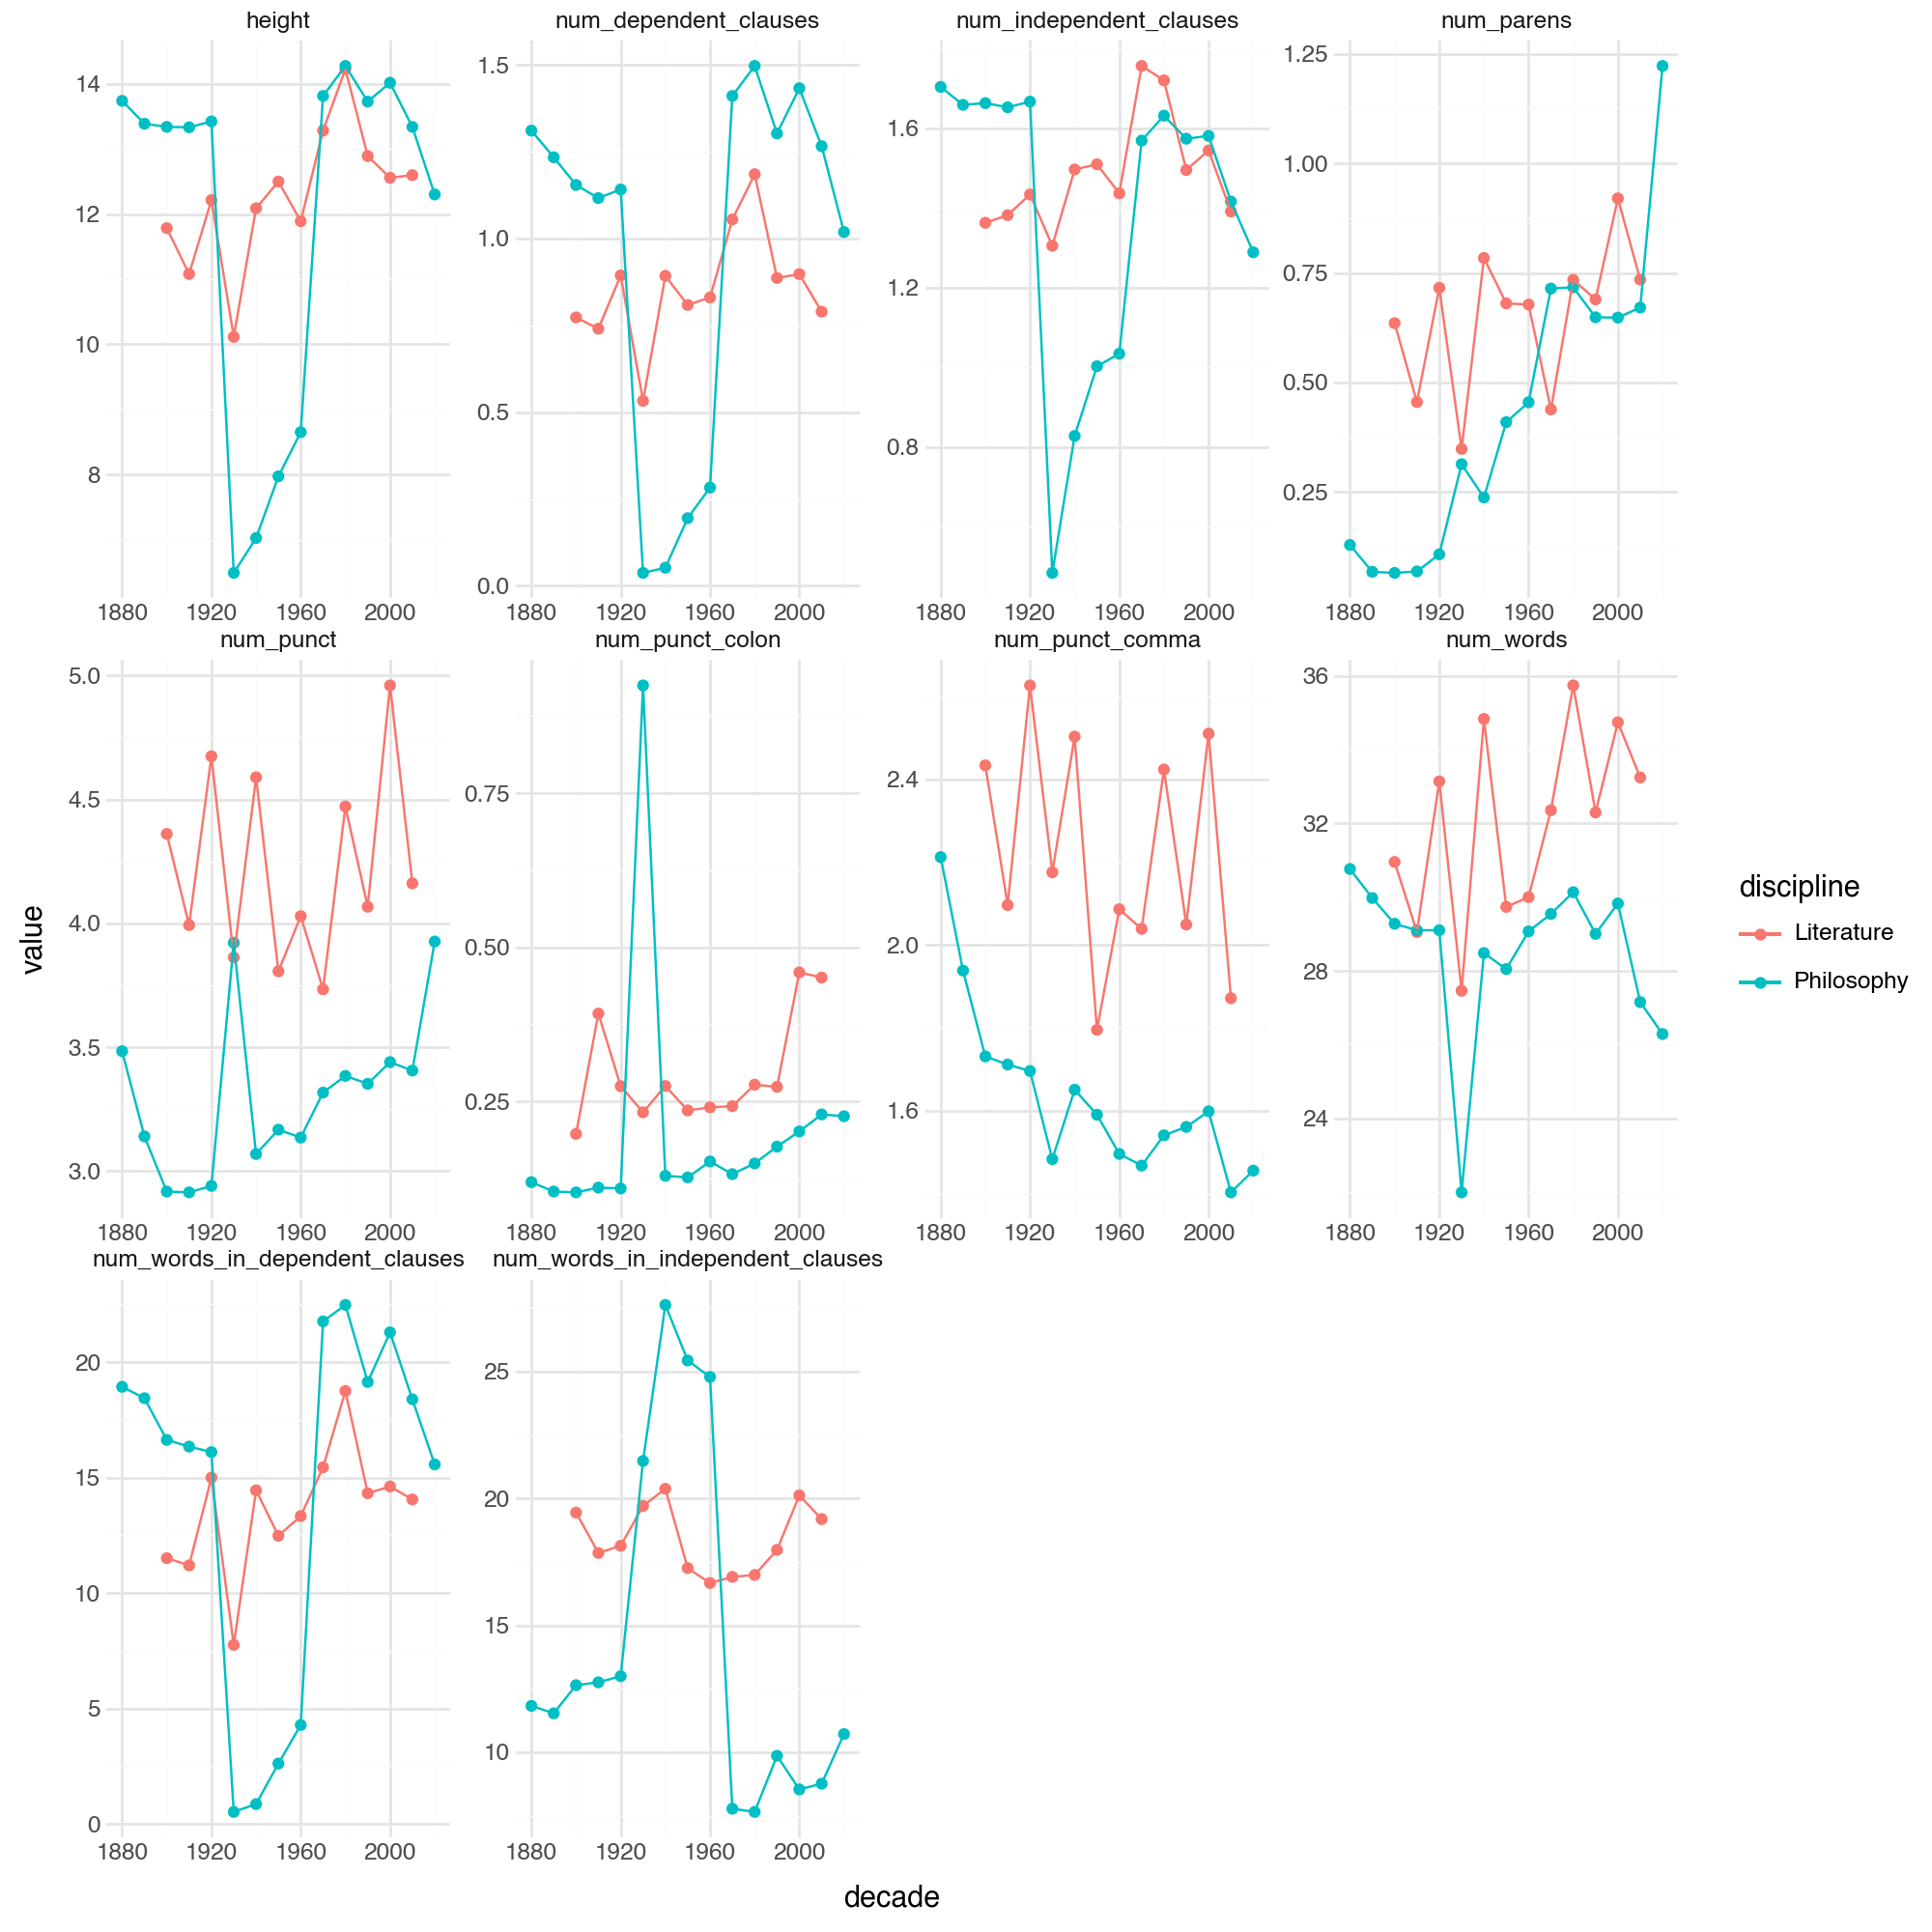

In [24]:
# !pip install plotnine
import plotnine as p9
p9.options.figure_size = (10, 10)
fig = p9.ggplot(figdf, p9.aes(x='decade', y='value', color='discipline')) + p9.geom_point() + p9.geom_line() + p9.theme_minimal() + p9.facet_wrap('variable', scales='free')
fig

In [29]:
# df_jstor_tree.iloc[0]

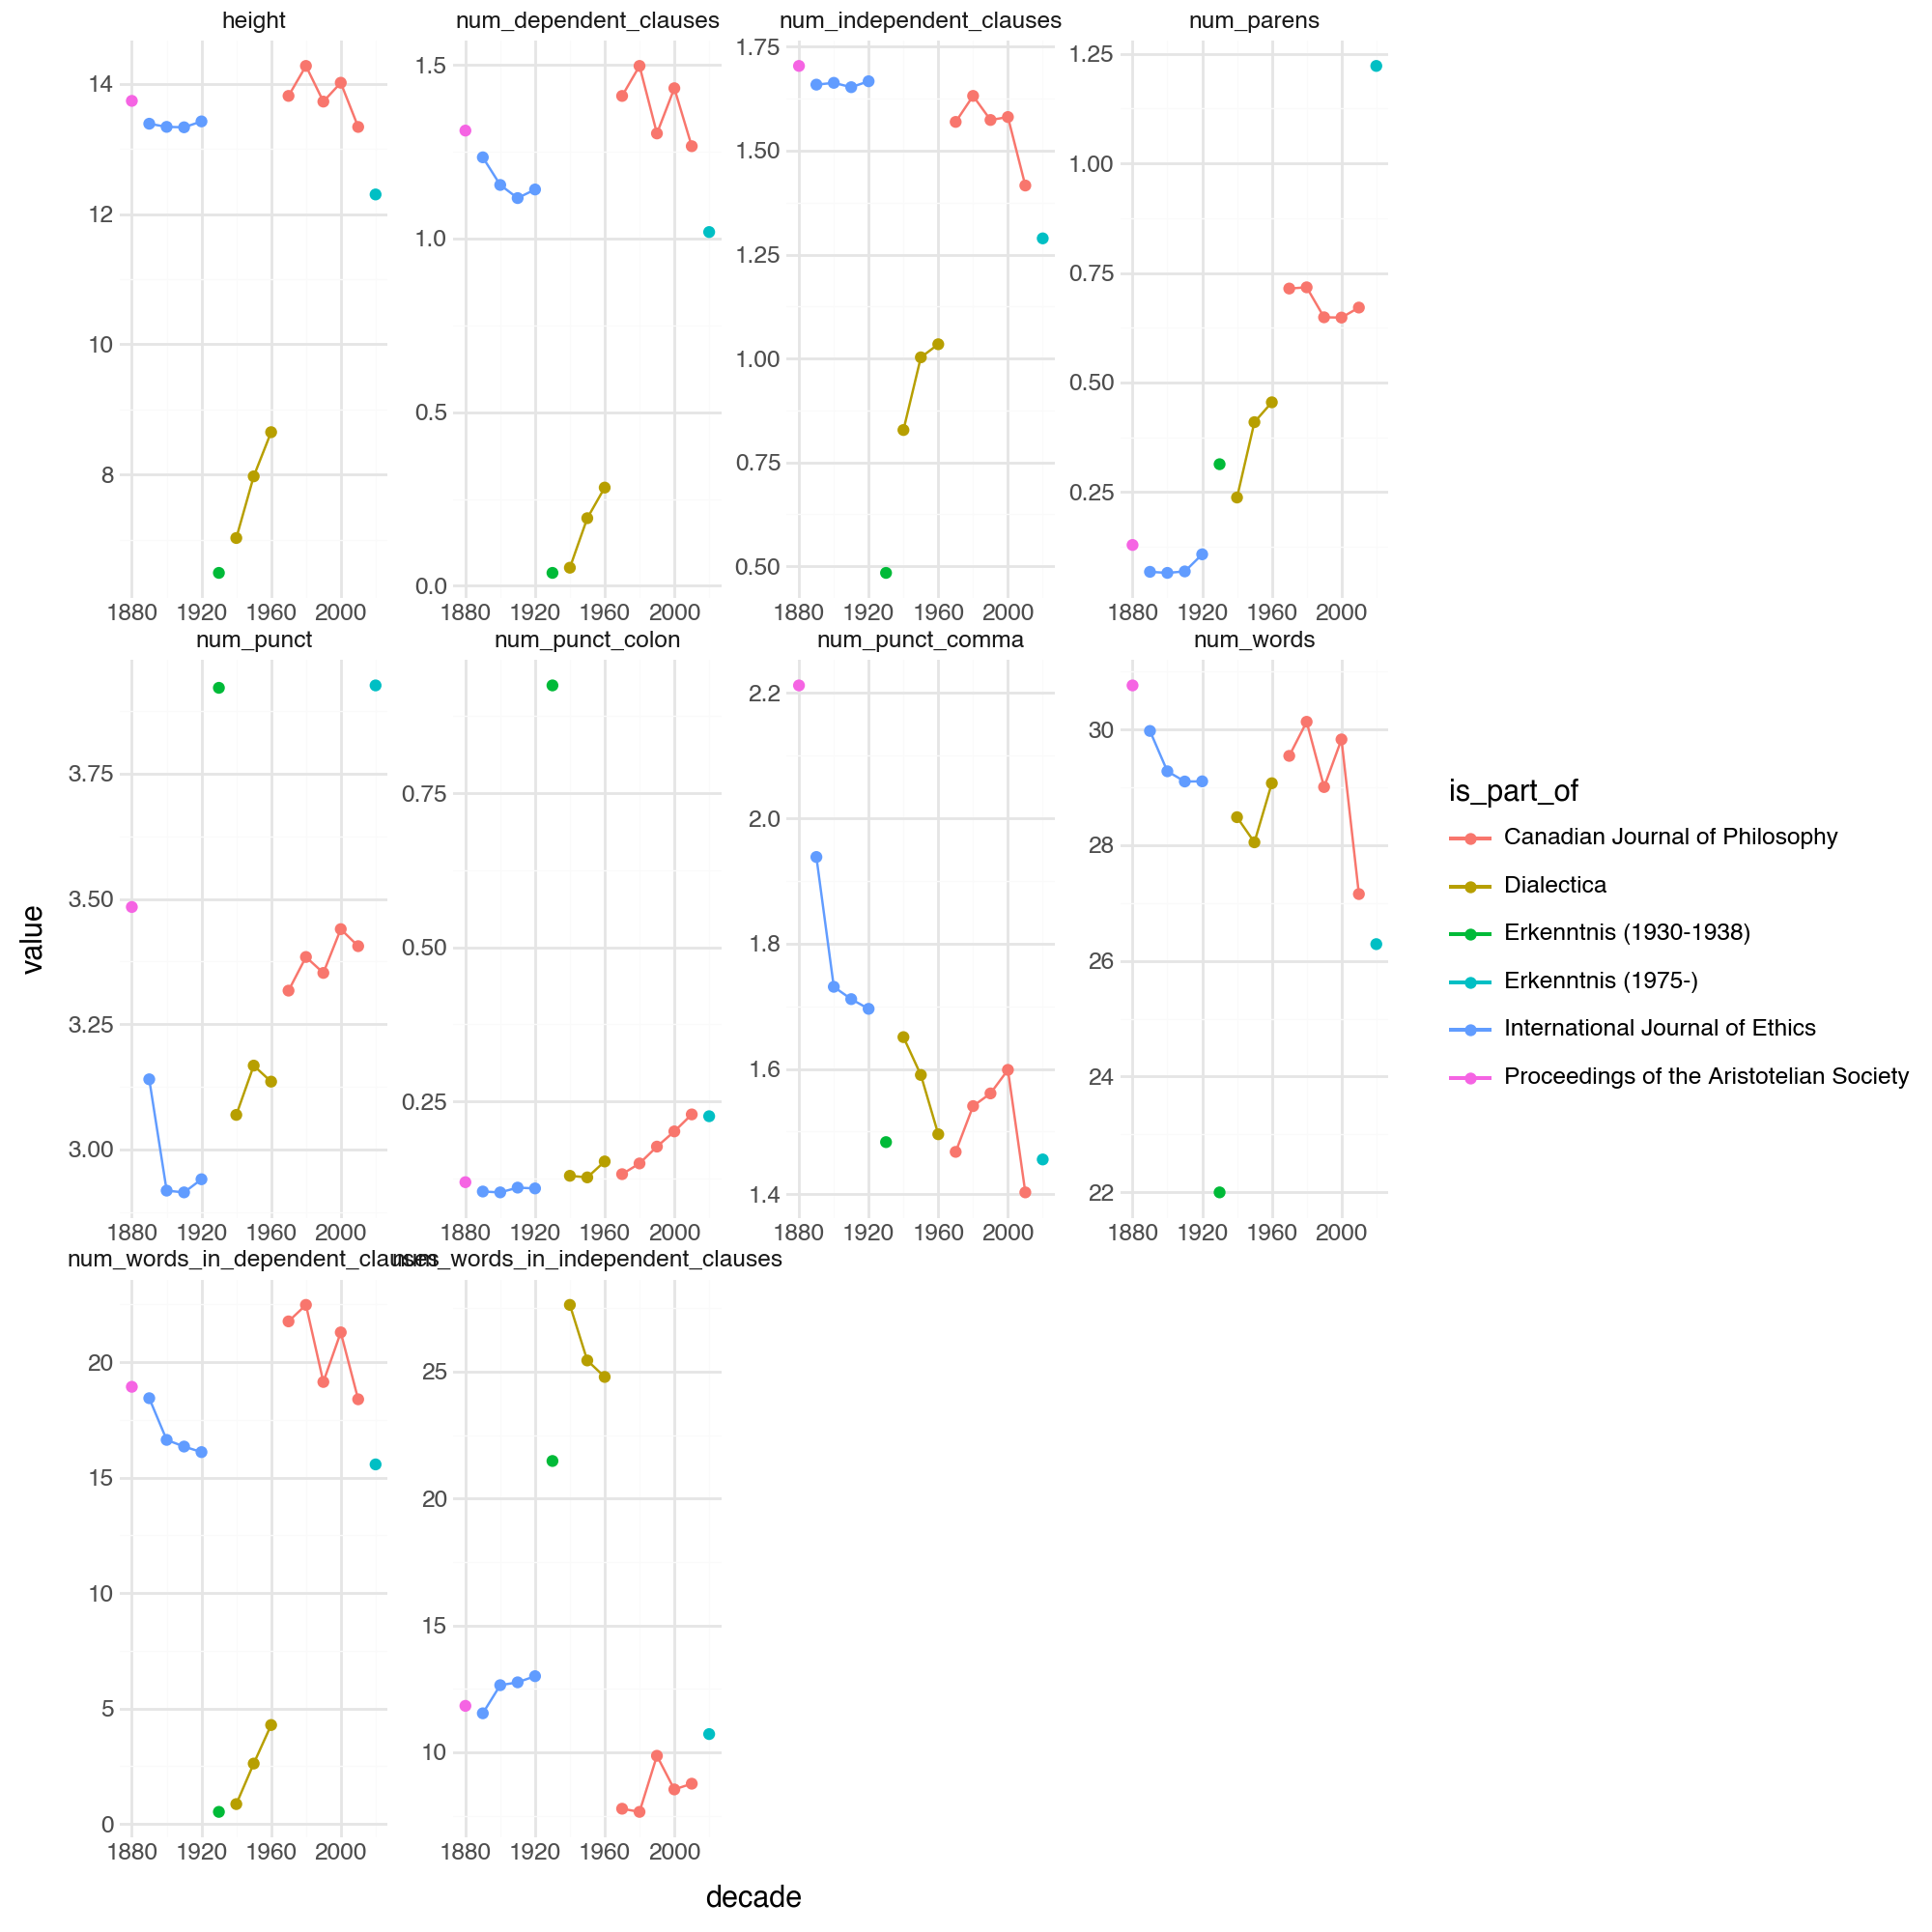

In [35]:
odf = df_jstor_tree.groupby(['is_part_of','decade']).mean(numeric_only=True)
figdf = odf.drop(columns=['year','contributed_content','review_required']).reset_index().melt(id_vars=['decade','is_part_of'])
figdf = figdf[(figdf['variable'] == 'num_words') | ~figdf['variable'].str.contains('per_word')]
fig = p9.ggplot(
    figdf, 
    p9.aes(x='decade', y='value', color='is_part_of')
) + p9.geom_point() + p9.geom_line() + p9.theme_minimal() + p9.facet_wrap('variable', scales='free')
fig

In [32]:
# df_combined.groupby(['discipline','decade'])['id'].nunique()

In [ ]:
# !pip install plotnine
import plotnine as p9
p9.options.figure_size = (10, 10)

